# Object Detection 이론

# 전통적 방법
전통적으로 (1)selective search + (2)Machine learning + (3)정확한 위치 찾아가기 로 3단계로 나눠서 처리했다.

## Selective Search

- 객체 인식이나 검출이 가능한 후보 영역(region)을 찾는 알고리즘.
- edge를 찾아서 초기 region을 나눈 후, 유사한 region끼리 통합(merge)해나간다.
- selective search로는 localization이 잘 안된다.
    - 어떻게 잘라도 고양이는 고양이다.
        - 정확하게 localization이 되지 않아도 객체 인식 및 분류가 가능하다.
        - 예를 들어서 고양이의 머리 부분만 selective search가 region을 잡아도 인식되고, 고양이의 몸통 부분만 region을 잡아도 인식된다. 그러므로 selective search가 정확하게 region을 못 잡아도 인식이 된다.
    - selective search는 실제 위치에 가까이 가는게 어렵다. 
        - object detection의 목표는 정확한 bounding boxes를 찾는 것이다.
            - 고양이의 머리 끝에서 발 끝까지 정확하게 박스를 그리는 것
        - selective search는 한방에 못 찾는다.
            - 좀 벗어나도 인식할 수 있기 때문이다.
        - 마지막에 정확한 위치로 보정하는 단계가 필요하다.  

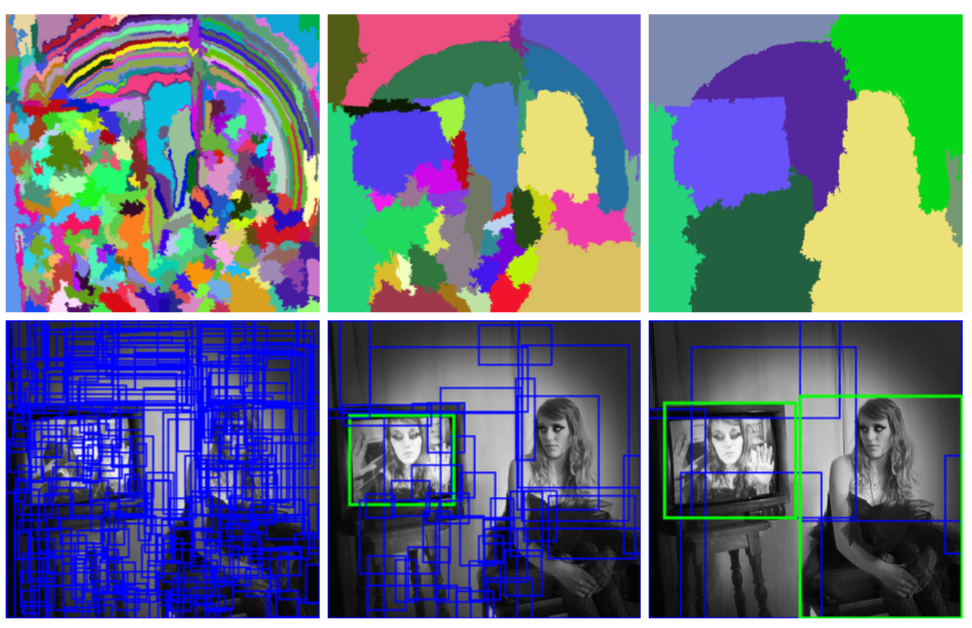


# RCNN
- 최초로 object detection에 CNN을 썼다는 점에서 의의가 있는 모델이다.
    - 그러나 CNN을 제대로 이해 못했기 때문에 최초의 시도라는 점에서만 의미있고, 현재는 실무에 쓰이지 않는다.
    - 성능은 그럭저럭 괜찮았다.
- 전통적인 방법에서 2단계의 기계학습을 CNN을 이용하였다. 
    - AlexNet을 가져다 썼다.
        - imageNet 대회는 class가 1000개였지만, 다른 대회에서는 50개, 20개 등으로 class 수가 다른 문제가 있었다.
    - Convolution layer만 쓰고, fully connected layer 대신 SVM을 썼다.
        - RCNN 초창기에는 transfer learning에 대한 개념이 보편적이지 않았던 기술적 한계가 있었다.
            - feature extraction하고 fc layer만 학습하는게 아니라 svm으로 바꿔버림
            - RCNN에도 여러가지 버전이 있다.(조금씩 개량됨)
        - fc layer에 비해서 SVM만이 가지는 장점 때문에 쓰이기도 했다. 
            - 예를들어 binary classification은 SVM이 성능이 좋다.
- pre-trained model을 썼기 때문에 resize를 해야만 했다.
    - resize는 왜곡되고 잘리는 문제가 있다.
    - 최종 정확한 위치를 찾는데 어렵다.
- 3단계는 SVM 썼다.
    - 속도가 느리다. 
        -  SVM은 멀티코어를 쓸 수 없는 모델(느린게 큰 단점, 속도향상 태생적으로 불가능)
        - 이후에 개선된 후속 모델은 fast라는 이름이 붙음
    - 그 당시 최고의 기계학습 알고리즘이었다.
- 잘 하는 것만 모아서 붙였다.(Hybrid model)
    - region 잘 찾는 전통기법 Selective Search
    - feature 잘 뽑는 CNN
    - 분류 잘하는 SVM
    - 잘하는 전문가들만 모였기 때문에 성능은 잘 나온다. 
    - 대신 학습이 오래 걸린다.
    - 그 당시에는 hybrid model이 인기였다. 
    
- Selective search로 찾은 모든 region을 cnn을 따로 돌리기 때문에 시간 오래 걸림

- R-CNN은 2page, 2stage 라고 한다.
    - object를 찾는 일과 object를 분류하는 일로 나뉜다.
    - end to end model이 아니다.

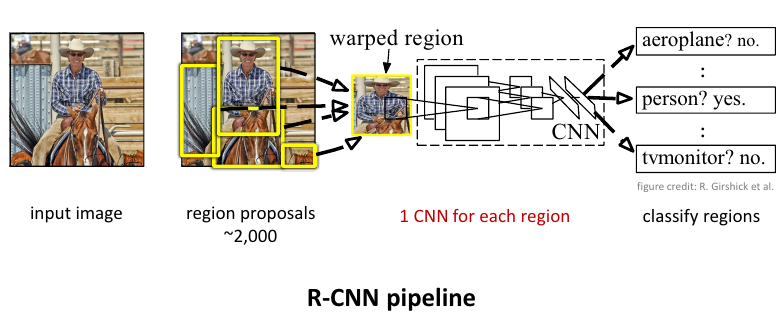   

# SPP net
- SPP net은 word embedding 같은 기법을 이용했다.
- CNN에 대한 이해가 깊었다. 
    - CNN을 거친 후의 feature map에서 object를 찾았다.    
- End-to-End를 지향했다.
- SVM을 아직도 썼다.
- 피라미드 구조를 썼다.
    - 그래서 이름이 SPP(Spatial Pyramid Pooling)이다.
- Object detection의 역사적 흐름에서 특출난 녀석이다.
    - 잘 몰라도 된다.
    - resize할때 정보가 소실되는 문제를 해결하는 방법을 고안했다는 점에서 의의 있을 뿐이다.

# Fast RCNN
- Convolution을 먼저 해서 feature map을 만든 다음에, RoI pooling(Region of Interest)으로 모양을 맞춰주고, SVM 대신에 FC layer를 이용했다.
- convolution을 먼저 하기 때문에 속도가 빠르다.
    - 기존의 RCNN은 selective search로 찾은 region proposal을 모두 CNN을 각각 돌려야했는데 중복되는 영역이 있어서 시간이 오래 걸렸다. 
    - 한번에 처리하기 때문에 중복되는 영역이 없다.
- RoI pooling은 SPP net과 개념이 유사하다.
- RoI Pooling 덕분에 resize로 인한 정보 소실을 막고, pre-trained model을 쓸 수 있다.
- SVM 대신에 fc layer를 썼기 때문에 속도가 빠르다.
- 전반적으로 RCNN보다 CNN을 잘 이해하고 있다.
- VGG 모델을 pre-trained로 썼다.
    - RCNN에 비해서 성능이 좋아진 이유는 AlexNet과 VGG의 성능 차이이다.
    - Fast RCNN은 성능이 아니라 속도 향상에 집중 연구했다.

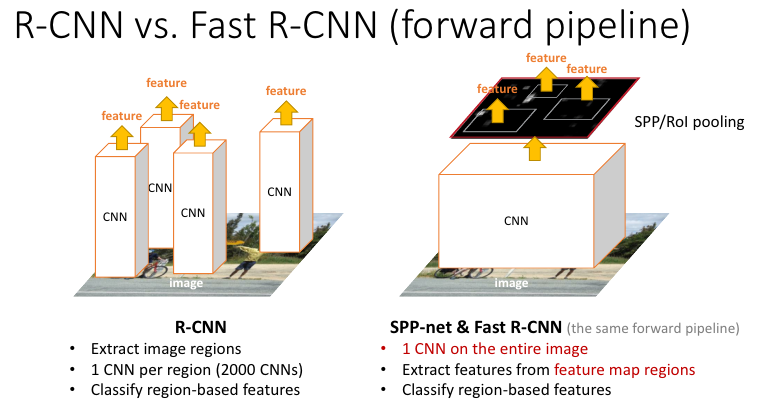

# Faster RCNN
- selective search 대신에 RPN(region proposal network)를 이용했다.
    - region proposal을 학습하기 때문에 빠르다.
    - End to end에 가까워졌다.
    
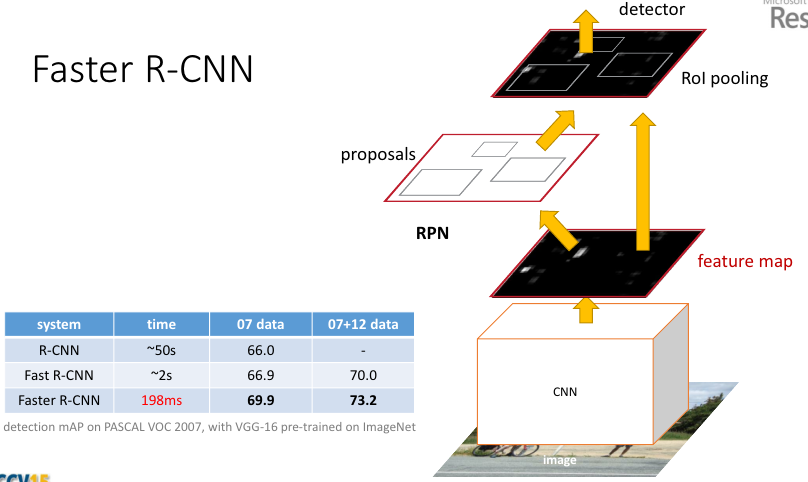

---

# 코드를 통한 RCNN 구조 이해

> pre-trained 모델은 원래 AlexNet을 썼지만, 더 간단한 VGG 모델을 이용하기로 한다(CNN 모델이기만 하면 되기 때문에 차이 없다)  
fc layer는 필요없다

In [1]:
from tensorflow.keras.applications import VGG16

In [2]:
model = VGG16(include_top=False)

In [3]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

> 이미지를 불러와보자.  
CNN(fc layer 없는 vgg)모델에 이미지를 넣어서 feature map을 얻는 게 목표이다.

In [4]:
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [7]:
x = load_img("practice/1.jpg", target_size=(224,224))

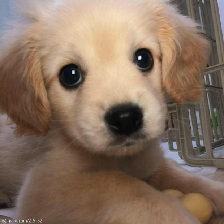

In [8]:
x

In [10]:
x = img_to_array(x)
x = preprocess_input(x)

In [13]:
import numpy as np

In [14]:
# batch 적용

x = x[np.newaxis]

In [18]:
# 최종 feature map

a1 = model.predict(x)
a1.shape

(1, 7, 7, 512)

> RCNN은 cnn에서 얻은 feature map을 input으로 SVM을 이용해서 classification하였다.  

>svm은 one-class 분류(binary classification)에서 성능이 우수한 특징이 있다.  
따라서, class가 20개인 object detection 대회라고 하면, SVM 모델을 20개 만들었다.(그래서 RCNN 설명 그림의 classify를 보면 yes or no)  
multi class 분류 모델보다 binary 분류 모델 여러개를 쓰는게 더 성능이 좋았다.(multi class 모델은 그만큼 데이터도 더 많이 필요하다)  
나중에 fc layer를 그대로 쓰면서 soft max layer를 쓰는 것으로 바뀐다.

In [21]:
from sklearn.svm import SVC
svc = SVC()

> 기계학습을 하려면 최소 데이터가 2개 이상 필요하다.  
더미 데이터를 하나 더 만들어 준다.

In [26]:
# 더미 데이터

train2 = np.fliplr(a1[0])

In [27]:
train2.shape

(7, 7, 512)

In [36]:
te = train2[np.newaxis]

In [37]:
te.shape

(1, 7, 7, 512)

In [38]:
# 2개 데이터를 합친다.

np.concatenate([a1, te]).shape

(2, 7, 7, 512)

In [39]:
# 기계학습은 최소한 2개 이상의 데이터가 있어야 한다.
# 기계학습은 2차원 데이터여야 하기 때문에 reshape한다.

train = np.concatenate([a1, te]).reshape(2,-1)

In [40]:
train.shape

(2, 25088)

In [24]:
# 임의로 만드는 class 

target = np.array([1, 0])

> train 데이터와 target 데이터로 svm을 학습시킨다.

In [41]:
svc.fit(train, target)

C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [ ]:
# imagenet dataset으로 만든 model의 convolution은 보편적으로 적용할 수 있는 특징이 있다. 
# 한 두가지 클래스만 할 때는 특정 데이터셋에 편향되어 추상화된 반면에 image net 모델은 달랐다.
# 그 당시에는 이러한 이해가 없었다.